In [1]:
import numpy as np

np.random.seed(42)

from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.metrics import accuracy_score, mean_squared_error, euclidean_distances
from sklearn.utils.validation import check_array, check_is_fitted, check_X_y
from sklearn.datasets import make_moons, load_iris, load_diabetes
from sklearn.model_selection import train_test_split

from scipy.stats import mode

import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "monospace"


In [2]:
# `_tree/`


class Node:
    def __init__(self):
        pass

    def __str__(self):
        pass


class TreeBuilder:
    def __init__(self):
        self.tree = None

    def __str__(self):
        return "\n".join(map(str, self))

    def __iter__(self):
        frontier = [self.tree]
        while frontier:
            tree_node = frontier.pop()
            yield tree_node
            frontier.extend(
                sorted(tree_node.children.values(), key=lambda n: not n.is_leaf)
            )


In [3]:
class KNeighborsClassifier(BaseEstimator, ClassifierMixin):
    """A K-nearest neighbors classifier implementation.

    Parameters
    ----------
    n_neighbors : int, default=5
        A hyperparmeter specifing the (positive) number of closest training instances.
    """

    def __init__(self, *, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        """Store the training instances.

        Parameters
        ----------
        X : np.ndarray
            2D feature matrix with shape (n_samples, n_features) of
            numerical values.

        y : np.ndarray
            1D target array with shape (n_samples,) of categorical values.

        Raises
        ------
        ValueError
            If `n_neighbors` attribute is neither and integer nor between
            one and the feature matrix length.
        """
        X, y = check_X_y(X, y)

        if not (isinstance(self.n_neighbors, int) and 1 <= self.n_neighbors <= len(X)):
            raise ValueError(
                "`n_neighbors` attribute must be an integer between one and the feature matrix length."
            )

        self.X_ = X
        self.y_ = y

        return self

    def predict(self, X):
        """Assign approximate categorical values from the test set.

        Parameters
        ----------
        X : np.ndarray
            2D test feature matrix with shape (n_samples, n_features) of
            numerical values.

        Returns
        -------
        np.ndarray
        """
        check_is_fitted(self)
        X = check_array(X)

        closest = np.argsort(euclidean_distances(X, self.X_), axis=1)[
            :, : self.n_neighbors
        ]
        neighbors = mode(self.y_[closest], axis=1, keepdims=False)
        return neighbors.mode

    def score(self, X, y):
        """Evaluate the performance of a K-nearest neighbors classifier.

        The metric used to evaluate the performance of a K-nearest
        neighbors classifier is `sklearn.metrics.accuracy_score`.

        Parameters
        ----------
        X : np.ndarray
            2D test feature matrix with shape (n_samples, n_features) of
            numerical values.

        y : np.ndarray
            1D test target array with shape (n_samples,) of categorical
            values.
        """
        check_is_fitted(self)
        X, y = check_X_y(X, y)

        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)


class KNeighborsRegressor(BaseEstimator, RegressorMixin):
    """A K-nearest neighbors regressor implementation.

    Parameters
    ----------
    n_neighbors : int, default=5
        A hyperparmeter specifing the (positive) number of closest training instances.
    """

    def __init__(self, *, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        """Store the training instances.

        Parameters
        ----------
        X : np.ndarray
            2D feature matrix with shape (n_samples, n_features) of
            numerical values.

        y : np.ndarray
            1D target array with shape (n_samples,) of numerical values.

        Raises
        ------
        ValueError
            If `n_neighbors` attribute is neither an integer nor between
            one and the feature matrix length.
        """
        X, y = check_X_y(X, y, y_numeric=True)

        if not (isinstance(self.n_neighbors, int) and 1 <= self.n_neighbors <= len(X)):
            raise ValueError(
                "`n_neighbors` attribute must be an integer between one and the feature matrix length."
            )

        self.X_ = X
        self.y_ = y

        return self

    def predict(self, X):
        """Assign approximate numerical values from the test set.

        Parameters
        ----------
        X : np.ndarray
            2D test feature matrix with shape (n_samples, n_features) of
            numerical values.

        Returns
        -------
        np.ndarray
        """
        check_is_fitted(self)
        X = check_array(X)

        neighbors = np.argsort(euclidean_distances(X, self.X_), axis=1)[
            :, : self.n_neighbors
        ]
        return np.mean(self.y_[neighbors], axis=1)

    def score(self, X, y):
        """Evaluate the performance of a K-nearest neighbors regressor.

        The metric used to evaluate the performance of a K-nearest
        neighbors regressor is `sklearn.metrics.mean_square_error`.

        Parameters
        ----------
        X : np.ndarray
            2D test feature matrix with shape (n_samples, n_features) of
            numerical values.

        y : np.ndarray
            1D test target array with shape (n_samples,) of numerical
            values.
        """
        check_is_fitted(self)
        X, y = check_X_y(X, y, y_numeric=True)

        y_pred = self.predict(X)
        return mean_squared_error(y, y_pred)

### `KNeighborsClassifier` and `KNeighborsRegressor` examples


In [4]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data[:, :2], iris.target, test_size=0.2, random_state=42
)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test).round(2)


0.77

In [5]:
diabetes = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=42
)

regr = KNeighborsRegressor()
regr.fit(X_train, y_train)
regr.score(X_test, y_test).round(2)


3019.08

### `KNeighborsClassifier` Vizualization on the `sklearn.datasets.make_moons` dataset


In [6]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# add noisy instance to existing dataset
X = np.insert(X, 0, [[1.75, -0.3]], axis=0)
y = np.insert(y, 0, [0], axis=0)


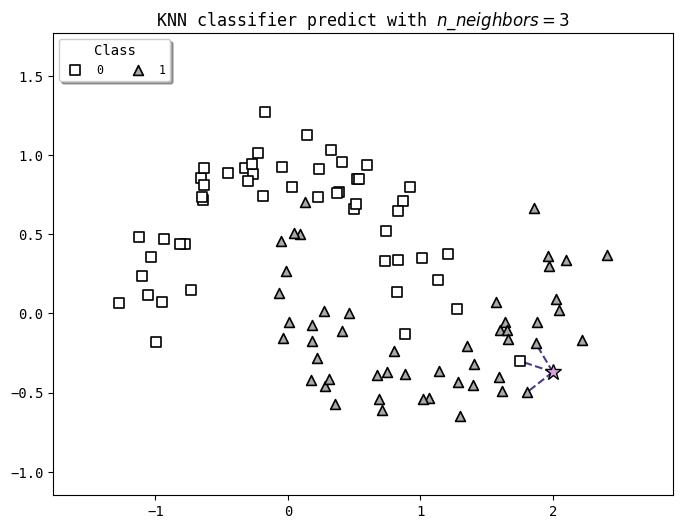

In [7]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

n_neighbors = 3
test_point = np.array([[2.0, -0.37]])

plt.figure(figsize=(8, 6))

plt.scatter(
    X[y == 0, 0],
    X[y == 0, 1],
    c="w",
    s=50,
    linewidth=1.2,
    marker="s",
    edgecolors="k",
    label=0,
    zorder=2,
)
plt.scatter(
    X[y == 1, 0],
    X[y == 1, 1],
    c="darkgray",
    s=50,
    linewidth=1.2,
    marker="^",
    edgecolors="k",
    label=1,
    zorder=2,
)
plt.plot(
    test_point[0, 0],
    test_point[0, 1],
    marker="*",
    markersize=12,
    markeredgecolor="k",
    markerfacecolor="plum",
    zorder=2,
)

closest = np.argsort(euclidean_distances(X, test_point), axis=0)[:n_neighbors]
neighbors = X[closest.ravel()]

for xx in neighbors:
    z = zip(test_point.reshape(-1), xx)
    plt.plot(*z, c="darkslateblue", linestyle="--", linewidth=1.5, zorder=1)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title(f"KNN classifier predict with $n\_neighbors={n_neighbors}$")
plt.legend(title="Class", loc="upper left", fontsize="small", ncols=2, shadow=True)
plt.show()


#### Decision Boundaries with varying `n_neighbors` values


In [8]:
from mpitree import DecisionTreeClassifier

clfs = [KNeighborsClassifier(n_neighbors=k).fit(X, y) for k in (1, 15, 55)] + [
    DecisionTreeClassifier(max_depth=d).fit(X, y) for d in (None, 2, 1)
]

labels = [
    f"K-Nearest Neighbors Classifer ($n\_neighbors={k})$" for k in (1, 15, 55)
] + [f"Decision Tree Classifer ($max\_depth={d})$" for d in (None, 2, 1)]


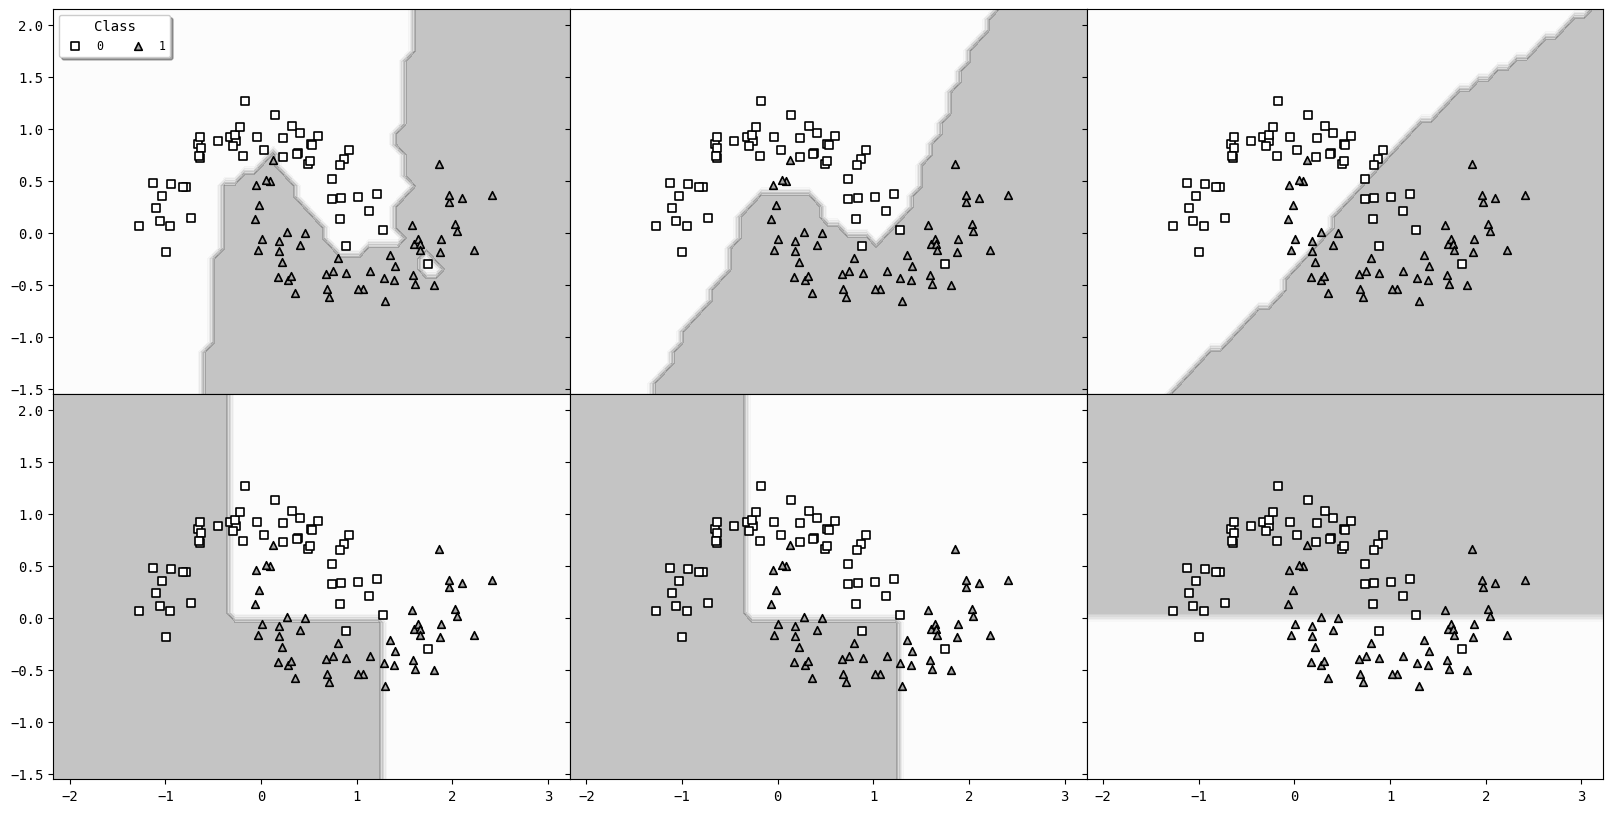

In [9]:
from itertools import product

x_min, x_max = X[:, 0].min() - 0.9, X[:, 0].max() + 0.9
y_min, y_max = X[:, 1].min() - 0.9, X[:, 1].max() + 0.9

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

n_rows, n_cols = 2, 3
fig, axs = plt.subplots(
    n_rows,
    n_cols,
    sharex="col",
    sharey="row",
    figsize=(20, 10),
    gridspec_kw={"wspace": 0, "hspace": 0},
)

for idx, clf, tt in zip(product(range(n_rows), range(n_cols)), clfs, labels):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axs[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.25, cmap="Greys")

    axs[idx[0], idx[1]].scatter(
        X[y == 0, 0],
        X[y == 0, 1],
        c="w",
        s=30,
        linewidth=1.2,
        marker="s",
        edgecolors="k",
        label="0",
    )
    axs[idx[0], idx[1]].scatter(
        X[y == 1, 0],
        X[y == 1, 1],
        c="darkgray",
        s=30,
        linewidth=1.2,
        marker="^",
        edgecolors="k",
        label="1",
    )

axs[0, 0].legend(
    title="Class", loc="upper left", fontsize="small", ncols=2, shadow=True
)
plt.show()


### `KNeighborsRegressor` Vizualization on a noisy $sin$ function with varying `n_neighbors` values


In [10]:
rng = np.random.RandomState(1)

X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))


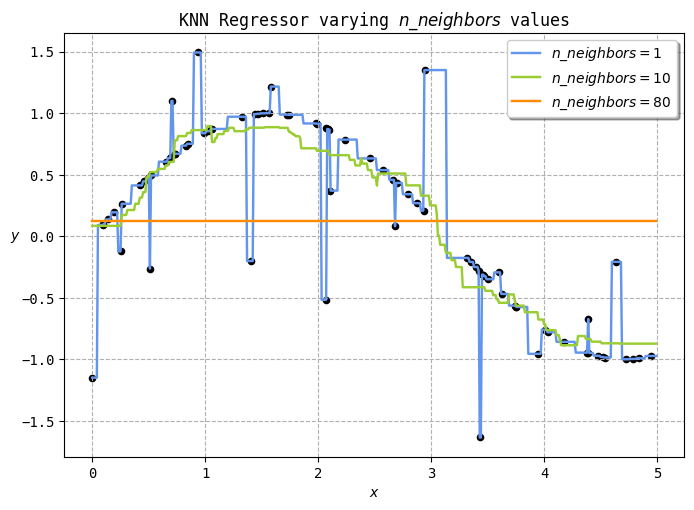

In [12]:
pallete = "cornflowerblue", "yellowgreen", "darkorange"
n_neighbors = 1, 10, 80

plt.figure(figsize=(8, 5.5))
plt.scatter(X, y, s=20, c="k")

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

for k, color in zip(n_neighbors, pallete):
    regr = KNeighborsRegressor(n_neighbors=k).fit(X, y)
    y_pred = regr.predict(X_test)
    plt.plot(X_test, y_pred, color=color, label=f"$n\_neighbors={k}$", linewidth=1.75)

plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)

plt.title(f"KNN Regressor varying $n\_neighbors$ values")
plt.legend(shadow=True)

plt.rc("grid", linestyle="--")
plt.grid(True)

plt.show()
